# Supervised machine learning in Python with scikit-learn

## James Bourbeau
### Madison Python Meetup (MadPy)
March 8, 2018

GitHub: https://github.com/jrbourbeau/madpy-ml-sklearn-2018 <br>
Slides: https://jrbourbeau.github.io/madpy-ml-sklearn-2018

## `$ whoami`

- Physics Ph.D. student at UW-Madison

- Originally introduced to programming with C++

- Started using Python for work and have been hooked since 👍

- Interested in machine learning and data science generally

## Supervised machine learning workflow

![overview](images/overview.jpg "overview")

<p style="font-size:14px">
Image source: <a href="https://sebastianraschka.com/blog/2016/model-evaluation-selection-part3.html">Model evaluation, model selection, and algorithm selection in machine learning</a> by Sebastian Raschka
</p>

## Outline

- What is machine learning?

    - Classical programming vs. machine learning

    - Different machine learning tasks 
    
- scikit-learn:

    - Data representation
    
    - Estimator API
    
- Example model: decision tree classifier

- Model validation

I've made a Python package, `plotting`, for this talk to simplify some of the code cell content (mostly related to plotting)

In [1]:
import plotting
import matplotlib.pyplot as plt
%matplotlib inline

Source code for `plotting` Python package can be found on GitHub with the rest of the talk material

# Machine learning vs. classical programming

## Classical programming

- Devise a set of rules (an algorithm) that are used to accomplish a task

- For example, labeling e-mails as either "spam" or "not spam"


In [2]:
def spam_filter(email):
    """Function that labels an email as 'spam' or 'not spam'
    """
    if 'Act now!' in email.contents:
        label = 'spam'
    elif 'hotmail.com' in email.sender:
        label = 'spam'
    elif email.contents.count('$') > 20:
        label = 'spam'
    else:
        label = 'not spam'

    return label

## Machine learning

- "Field of study that gives computers the ability to learn without being explicitly programmed" &mdash; Arthur Samuel (1959)

- "A machine-learning system is trained rather than explicit programmed. Its presented with many examples relevant to a task, and it finds statistical structure in these examples that eventually allows the system to come up with rules for automating the task" &mdash; Francois Chollet, *Deep Learning with Python*

- Machine learning is particularly useful for higher dimensional datasets and for problems such as image recognition where classical programming is hard

- The influx of data from our ever increasingly digital world has enabled machine learning to be utilized in many more use cases 

## Classical programming vs. machine learning

![Classical programming vs. machine learning. From *Deep Learning with Python* by Francois Chollet.](images/classical-vs-ML.png "Classical programming vs. machine learning. From *Deep Learning with Python* by Francois Chollet.")

Image source: [_Deep Learning with Python_](https://www.manning.com/books/deep-learning-with-python) by Francois Chollet

## Types of machine learning

- Supervised learning &mdash; Uses labeled data for training an algorithm. The algorithm learns how to successfully map between input data and the desired output.

- Unsupervised learning &mdash; Uses unlabeled data to allow an algorithm to discover a pattern and structure within the data.

    - Clustering
    
    - Dimensionality reduction
    
- Reinforcement learning

## Supervised machine learning

- Models are trained using labeled data, hence the "supervised" in supervised learning. 

- Have a model learn from a labeled dataset (often called a training dataset) and make predictions about future, yet unseen, data. 

- Goal is to have trained model generalize well to future, yet unseen, data.

- Model learns a mapping between input data and the desired output label.

- Supervised machine learning is further divided into two types of problems:
    <!-- - Classification &mdash; specify which of `k` categories some input belongs to. E.g. classify input e-mails as "spam" or "not spam".-->
    
    - Classification &mdash; Labels are discrete. E.g. classify input e-mails as "spam" or "not spam".

    - Regression &mdash; Labels are continuous. E.g. home prices. 

## Unsupervised machine learning

- Models are trained using unlabeled data, hence the "unsupervised" in unsupervised learning. 

- Model tries to find underlying structure within dataset.

- Examples of unsupervised machine learning tasks:

    - Clustering &mdash; Find meaningful subgroups, or clusters, within a dataset. E.g. Marketing programs for different clusters of customers. 

    - Dimensionality reduction &mdash; Reduce the dimensionality of dataset.

# Machine learning in Python with scikit-learn

## scikit-learn

- Designed to be a [well documented](http://scikit-learn.org/stable/), well tested, and fast machine learning library that is approachable for non-specialist. 

- Only dependencies for installation are NumPy >= 1.8.2 and SciPy >= 0.13.3

- scikit-learn can be easily installed with `pip`, `conda`, or built from source

    - `pip install scikit-learn`

    - `conda install scikit-learn`

## Data representation in scikit-learn

- Formatted feature matrix of with `n_samples` rows and `n_features` columns 

- Target (or label) vector with `n_samples` items

- Dataset will be NumPy `ndarray` objects for this talk

![scikit-learn data representation](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/figures/05.02-samples-features.png)

<p style="font-size:14px">
Image source: <a href="https://github.com/jakevdp/PythonDataScienceHandbook">Python Data Science Handbook</a> by Jake Vanderplas
</p>

## NumPy N-dimensional array

- NumPy `ndarray` object is the standard data structure.

    - Can think of a NumPy array as an efficient Python `list`.
    
    - Item in array must be of the same type. 
    
    - Size of array must be specified to allocate the appropriate amount of memory. 
    
- NumPy arrays are at the core of nearly the entire Python data science ecosystem. 

## Iris dataset


![Iris dataset](images/iris-nolabel.png)

## Example classification problem: flower classification

- Dataset consists of 150 samples (individual flowers) that have 4 features: sepal length, sepal width, petal length, and petal width (all in cm)
    
- Target classes to predict are the iris plant species: Iris Setosa, Iris Versicolour, Iris Virginica
    
- Classic classification problem example

- Iris dataset is freely available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris)

## Loading the iris dataset

In [3]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
print(f'First 5 samples of X: \n{X[:5]}')
print(f'Labels: \n{y}')

First 5 samples of X: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


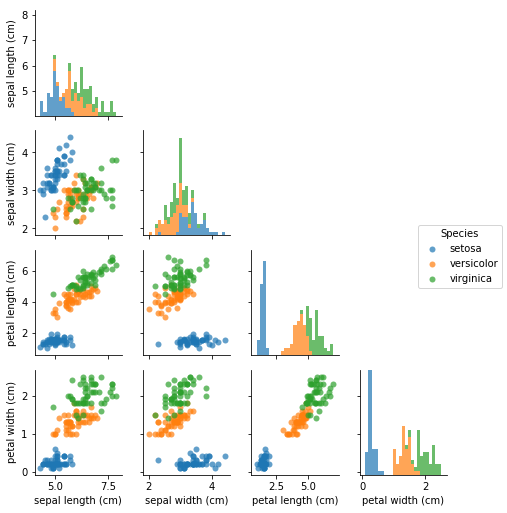

In [4]:
plotting.plot_iris_dataset()

In [5]:
X = X[:, :2]

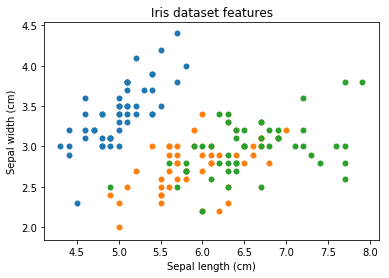

In [6]:
for target, label in zip(range(3), ['setosa', 'versicolor', 'virginica']):
    plt.scatter(X[y == target, 0], X[y == target, 1], color=f'C{target}', lw=0)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Iris dataset features')
plt.show()

## Estimators in scikit-learn

- Algorithms are implemented as classes (known as estimators) in scikit-learn

In [7]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression, LogisticRegression

- A model is an instance of one of these estimator classes

In [8]:
model = DecisionTreeClassifier()

- Each estimator in scikit-learn is extensively documented (see the [DecisionTreeClassifier documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))

    - API documentation
    
    - User guide
    
    - Examples

## Estimator API

<br>

```python
class Estimator(BaseClass):

    def __init__(self, **hyperparameters):
        # Setup Estimator here
        
    def fit(self, X, y):
        # Implement algorithm here
        
        return self
       
    def predict(self, X):
        # Get predictions from fitted model
        
        return y_pred
```

## Estimator API

Each type of algorithm, e.g. `DecisionTreeClassifier`, `GradientBoostingRegressor`, etc., have their own hyperparameters 

In [9]:
model_1 = DecisionTreeClassifier(max_depth=5)
model_2 = DecisionTreeClassifier(max_depth=100)

In [10]:
# Create the model
model = DecisionTreeClassifier()

# Fit the model
model.fit(X, y);

## Example algorithm: decision tree classifier

- Easy to understand and interpretable model

- Requires little data preparation

- Building block for more advanced models (i.e. random forests, boosted decision trees)

Idea behind the decision tree algorithm is to sequentially partition a training dataset by asking a series of questions. 

![Decision tree](images/tree.png "Decision tree")


<p style="font-size:14px">
Image source: <a href="https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1787125939">Python Machine Learning</a> by Sebastian Raschka
</p>

## Decision tree classifier in scikit-learn

In [11]:
from sklearn.tree import DecisionTreeClassifier

Hyperparameters:

- `max_depth` : The maximum depth of the tree.

- `criterion` : The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

## Decision regions 

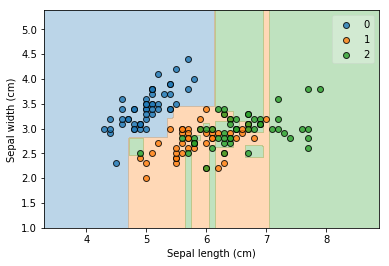

In [12]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, model, colors='C0,C1,C2', markers='ooo', hide_spines=False)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

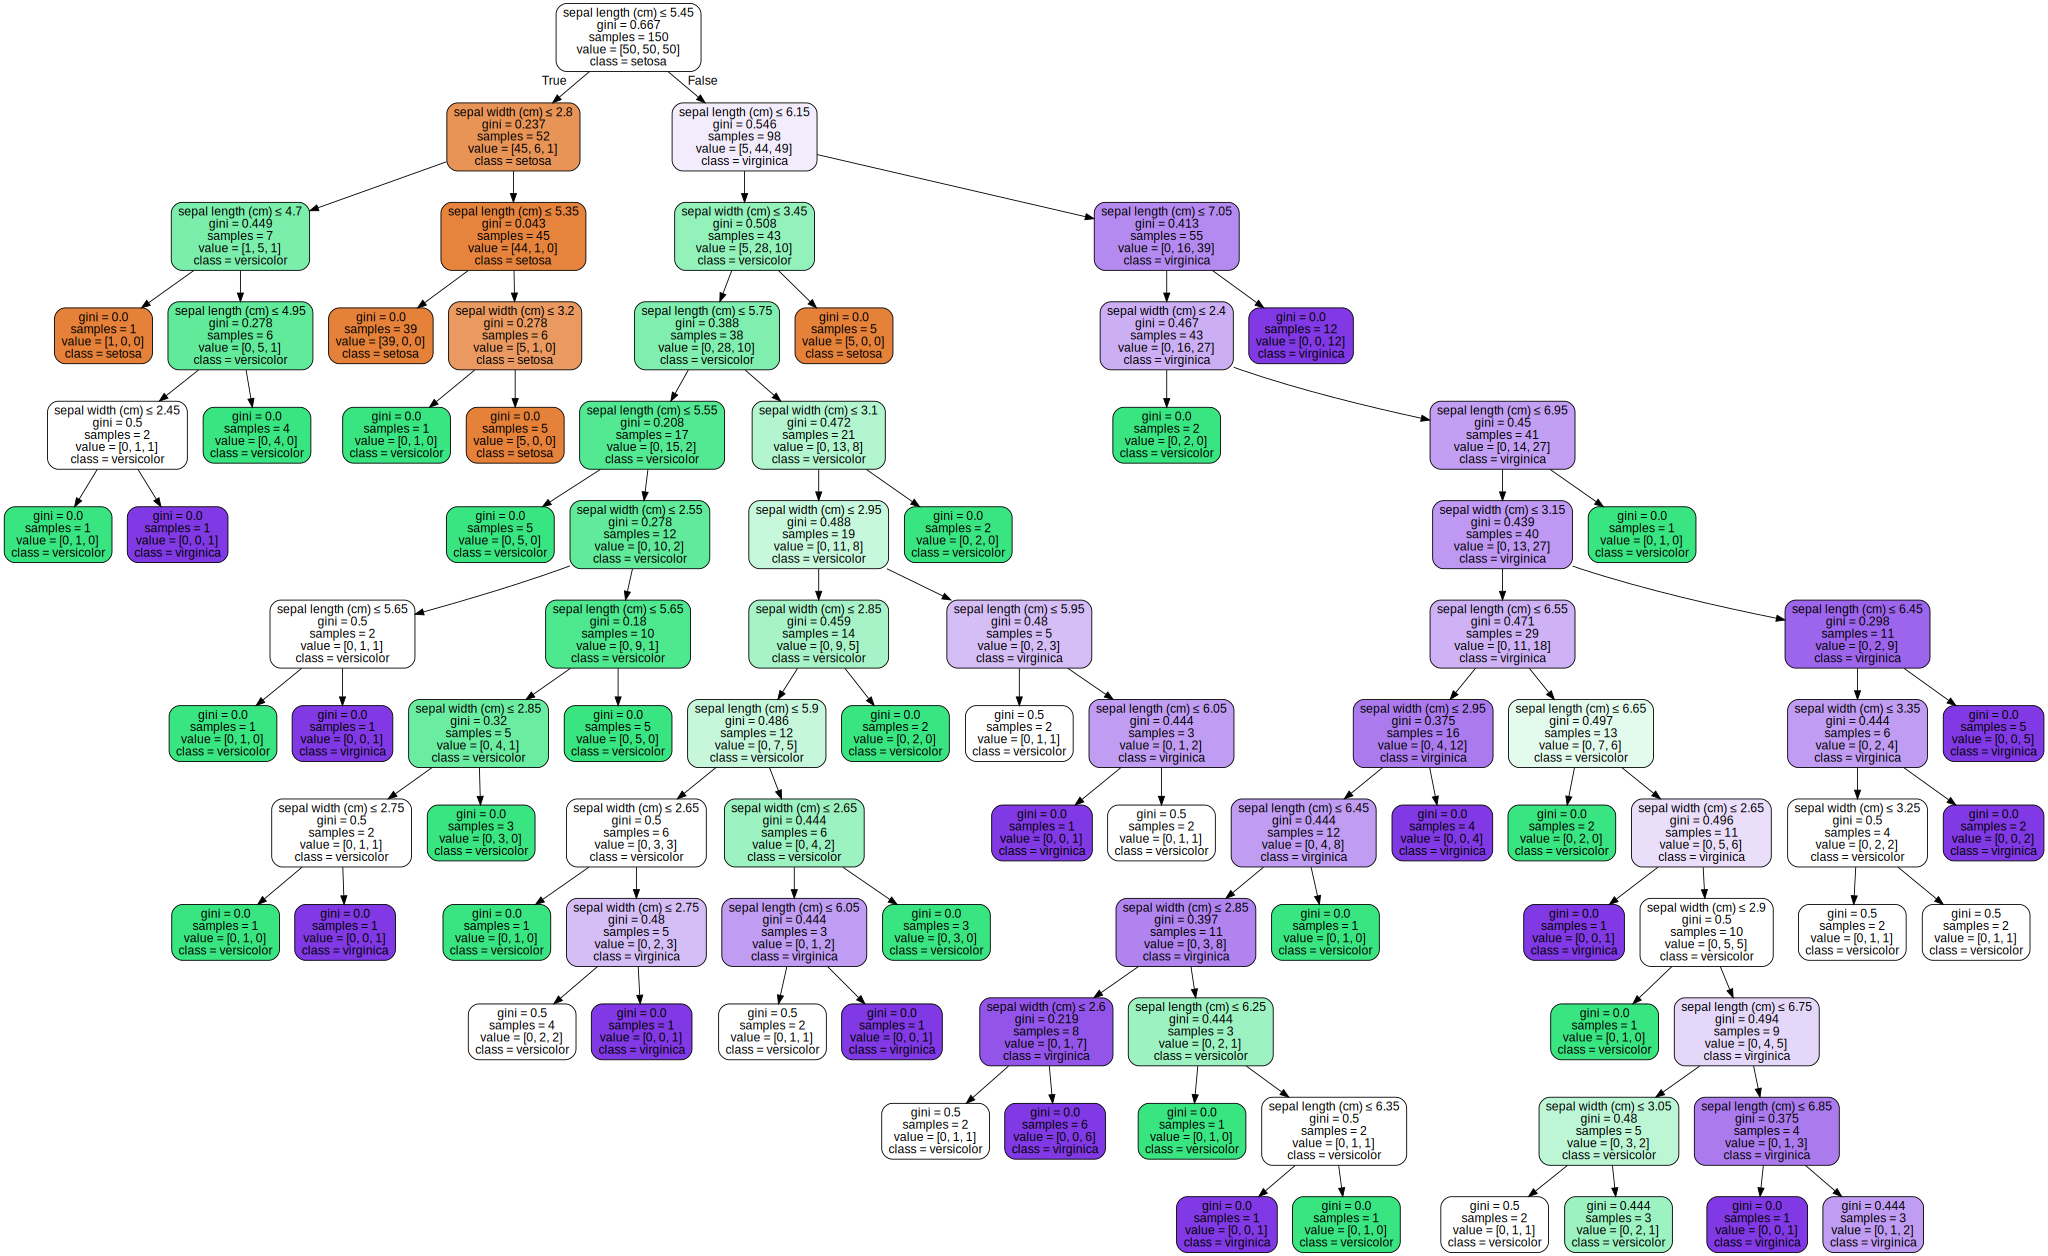

In [13]:
plotting.plot_decision_tree(model)

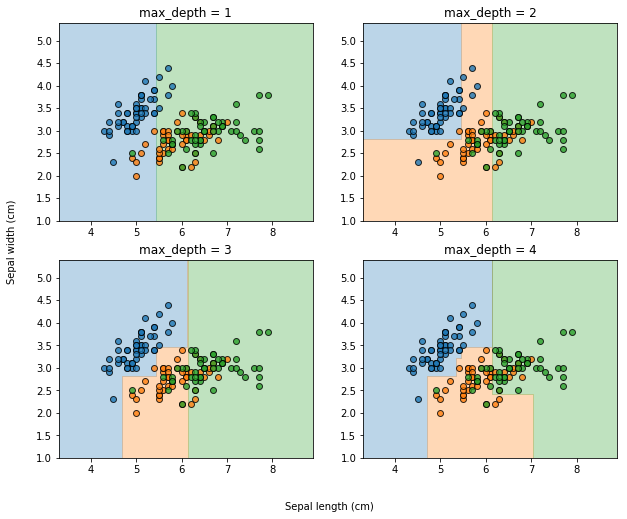

In [14]:
plotting.plot_max_depth_decision_regions()

## Model validation

## Testing & training sets

- A trained model will generally perform better on data that was used to train it

- scikit-learn has a convenient `train_test_split` function that randomly splits a dataset into a testing and training set

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(f'X.shape = {X.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'X_train.shape = {X_train.shape}')

X.shape = (150, 2)
X_test.shape = (30, 2)
X_train.shape = (120, 2)


## Model performance metrics

- There are many different performance metrics for classification and regression problems. Which metric you should use depends on the particular problem you are working on

- Many commonly used performance metrics are built into the `metrics` module in scikit-learn 

- However, a user-defined scoring function can be created using the `sklearn.metrics.make_scorer` function

In [16]:
# Classification metrics
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score, log_loss)

In [17]:
# Regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
y_pred = [0, 2, 1, 3, 1]
y_true = [0, 1, 1, 3, 2]
accuracy_score(y_true, y_pred)

0.6

## Cross-validation

- Goal is to have a model generalize well to new, unseen data that wasn't used to train the model

- It's standard practice to leave a portion of data set aside (i.e. not used in model training) as a validation, or testing set 

### $k$-fold cross validation 

- The simplest cross-validation method, $k$-fold cross validation, consists of:
    
    - Partioning a dataset into $k$ different folds
    
    - Use $k-1$ of the folds to train a model, and one fold to evaluate the model performance
    
    - Repeat $k$ times
    
- Can calculate the average and standard deviation of the model performance on the different folds

- Quantifies how well the model generalizes to new data

### $k$-fold cross validation diagram

![Classical programming vs. machine learning. From *Deep Learning with Python* by Francois Chollet.](images/cv.png "Classical programming vs. machine learning. From *Deep Learning with Python* by Francois Chollet.")


<p style="font-size:14px">
Image source: <a href="https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1787125939">Python Machine Learning</a> by Sebastian Raschka
</p>

## Cross validation in scikit-learn


Many different cross validation techniques are implemented in the `sklearn.model_selection` module
- `sklearn.model_selection.KFold`&mdash;$k$-fold cross validation

- `sklearn.model_selection.StratifiedKFold`&mdash;$k$-fold cross validation variant where the splits preserve the percentage of samples for each class

- `sklearn.model_selection.LeaveOneOut`&mdash;Each sample is used once as a test set

- Etc. 

Cross-validator objects have a `split` method that returns an generator of indices to split a dataset into training and testing sets

In [19]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=2, shuffle=True, random_state=2)
folds = kf.split(X)
train_index, test_index = next(folds)
print(f'train_index = {train_index}')
print(f'test_index = {test_index}')

train_index = [  1   4   7   8   9  10  15  17  19  22  26  31  32  33  34  37  38  39
  40  43  46  47  49  50  51  52  56  57  58  60  61  62  63  66  67  68
  69  70  72  73  75  76  79  80  82  83  86  88  90  95 100 102 103 104
 107 109 110 111 112 116 118 120 121 122 124 130 133 137 138 139 142 145
 146 147 149]
test_index = [  0   2   3   5   6  11  12  13  14  16  18  20  21  23  24  25  27  28
  29  30  35  36  41  42  44  45  48  53  54  55  59  64  65  71  74  77
  78  81  84  85  87  89  91  92  93  94  96  97  98  99 101 105 106 108
 113 114 115 117 119 123 125 126 127 128 129 131 132 134 135 136 140 141
 143 144 148]


In [20]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=2, random_state=2)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## Cross validation in action&mdash;tuning hyperparameters

- It's standard practice to choose the value of a models hyperparameters by 

- "Validation curves"

## Supervised machine learning workflow

![overview](images/overview.jpg "overview")

<p style="font-size:14px">
Image source: <a href="https://sebastianraschka.com/blog/2016/model-evaluation-selection-part3.html">Model evaluation, model selection, and algorithm selection in machine learning</a> by Sebastian Raschka
</p>

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Get training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=2)

# Use GridSearchCV to find optimal hyperparameter values
clf = DecisionTreeClassifier(random_state=2)
parameters = {'max_depth': range(1, 20),
              'criterion': ['gini', 'entropy']}
gridsearch = GridSearchCV(clf, parameters, scoring='accuracy', cv=10)
gridsearch.fit(X_train, y_train)
print(f'gridsearch.best_params_ = {gridsearch.best_params_}')
best_clf = gridsearch.best_estimator_

# Get tuned model performance from testing set
y_pred = best_clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f'test_acc = {test_acc}')

# Train final model on full dataset
final_model = DecisionTreeClassifier(random_state=2, **gridsearch.best_params_)
final_model.fit(X, y);

gridsearch.best_params_ = {'criterion': 'gini', 'max_depth': 3}
test_acc = 0.7666666666666667


## Additional Resources

### Books
- _Python Machine Learning_ by Sebastian Raschka [[Amazon](https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1787125939)][[GitHub](https://github.com/rasbt/python-machine-learning-book-2nd-edition)]

- _Deep Learning_ by Ian Goodfellow, Yoshua Bengio, and Aaron Courville [[Amazon](https://www.amazon.com/Deep-Learning-Adaptive-Computation-Machine/dp/0262035618)]

### Videos

- Machine Learning with scikit learn by Andreas Mueller & Alexandre Gram (SciPy 2017) [[YouTube-part 1](https://www.youtube.com/watch?v=2kT6QOVSgSg)][[YouTube-part 2](https://www.youtube.com/watch?v=WLYzSas511I)]


### Software 

- mlxtend &mdash; A library of extension and helper modules for Python's data analysis and machine learning libraries [[GitHub](https://github.com/rasbt/mlxtend)]

- xgboost &mdash; Scalable, portable, and distributed gradient boosting library [[GitHub](https://github.com/dmlc/xgboost)]

# Thank you

## Any questions?